In [2]:
from transformers import Speech2TextFeatureExtractor, Speech2TextModel
import torch
import numpy as np
from scipy import signal
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import librosa.display as ld


from auditory_cortex.models import Regression
from auditory_cortex.dataset import Neural_Data

# initialise and load pretrained models
model = Speech2TextModel.from_pretrained("facebook/s2t-small-librispeech-asr")
feature_extractor = Speech2TextFeatureExtractor.from_pretrained("facebook/s2t-small-librispeech-asr")
# reg = Regression(dir, subject)

for param in model.parameters():
    param.requires_grad = False

Some weights of the model checkpoint at facebook/s2t-small-librispeech-asr were not used when initializing Speech2TextModel: ['lm_head.weight']
- This IS expected if you are initializing Speech2TextModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Speech2TextModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Speech2TextModel were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr and are newly initialized: ['model.encoder.embed_positions.weights', 'model.decoder.embed_positions.weights']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
layers = ["encoder.conv.conv_layers.0","encoder.conv.conv_layers.1","encoder.layers.0.fc2",
			"encoder.layers.1.fc2","encoder.layers.2.fc2","encoder.layers.3.fc2",
			"encoder.layers.4.fc2","encoder.layers.5.fc2","encoder.layers.6.fc2",
			"encoder.layers.7.fc2","encoder.layers.8.fc2","encoder.layers.9.fc2"]

In [ ]:
# from gradient_extraction.get_values import GetValues

# get_layer_output = GetValues(model, feature_extractor)
# # aud = aud_data
# # n = 0 
# l = layers[1]
# layer_outs = []
# for i in range(500):
#     sr, aud = read("/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/audio_data/sent_" + str(i) +".wav")
# # for n, l in enumerate(layers[:1]):
#     # print(n, l)
#     get_layer_output.get_layer_output(aud, l)
#     x =  get_layer_output.hook.output_f[0].detach().numpy().mean(1)
#     # print(x.shape)
#     layer_outs.append(get_layer_output.hook.output_f[0].detach().numpy().mean(1))

# np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_1.npy', layer_outs, allow_pickle=True)
# a = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_1.npy', allow_pickle=True)
# a.shape

In [5]:
import numpy as np

a = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_0.npy', allow_pickle=True)
b = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_1.npy', allow_pickle=True)

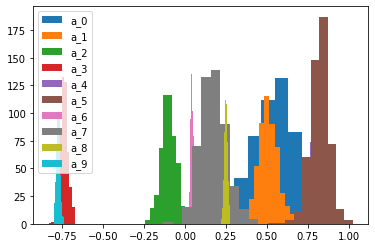

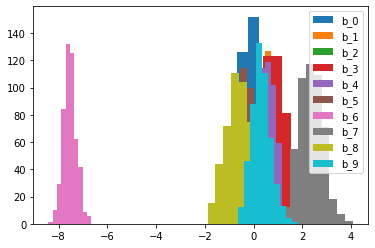

In [2]:
import matplotlib.pyplot as plt

plt.figure()

for i in range(10):
    # plt.figure()
    plt.hist(a[:, i], label="a_" + str(i))
    # plt.hist(b[:, i], label="b_" + str(i))

plt.legend()

plt.figure()

# plt.hist(b)
for i in range(10):
    # plt.figure()
    # plt.hist(a[:, i], label="a_" + str(i))
    plt.hist(b[:, i], label="b_" + str(i))

# plt.hist(b)
# plt.show()
plt.legend()
plt.show()

In [3]:
from gradient_extraction.get_optimal_input import GetOptInput

get_opt_input = GetOptInput(model, feature_extractor)
spect_lists = []
loss_lists = []

n = 0 
l = layers[0]
for i in range(1):
    sr, aud = read("/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/audio_data/sent_" + str(i) +".wav")
# for n, l in enumerate(layers[:1]):
    # print(n, l)
    get_opt_input.get_opt_input(aud, n, l, iterations=100)
    
    # spect_lists.append(get_opt_input.spect_list)
    # loss_lists.append(get_opt_input.loss_lists)
    np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/opt_inputs/conv_layer_0_sent_'+str(i)+'.npy', get_opt_input.spect_list, allow_pickle=True)
    # np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/opt_inputs/conv_layer_0_sent_'+str(i)+'.npy', get_opt_input.lo_list, allow_pickle=True)


In [ ]:
import librosa
# fig, ax = plt.figure()

sr, aud = read("/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/aud.wav")

S = librosa.feature.melspectrogram(y=aud, sr=sr, n_mels=80, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure()
ld.specshow(S_dB, sr=sr, x_axis='time', y_axis='linear')
plt.title("Librosa - Mel_Spec power to dB")
print("librosa shape: ", S_dB.shape)

# plt.plot(aud[5000:10000])
plt.figure()
plt.specgram(aud, Fs=16000)
plt.title("Matplot_specshow")

plt.figure()
f, t, Sxx = signal.spectrogram(aud, fs=16000, nfft=512)
plt.pcolormesh(t, f, np.log10(Sxx))
print("Scipy shape: ", Sxx.shape)
plt.title("Scipy")


plt.figure()
spect = feature_extractor(aud, padding=False, sampling_rate=16000, return_tensors="pt").input_features
ld.specshow(spect.numpy()[0].T, sr=sr, x_axis='time', y_axis='linear')
plt.title("FEature extractor")

print("feature extractor: ",spect.shape)
# plt.imshow(spect[0].T)
plt.show()

In [ ]:
sr, aud = read("/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/aud.wav")

aud = aud[5000:10000]
S = librosa.feature.melspectrogram(y=aud, sr=sr, n_mels=80, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure()
ld.specshow(S_dB, sr=sr, x_axis='time', y_axis='linear')
plt.title("Librosa - Mel_Spec power to dB")
print("librosa shape: ", S_dB.shape)

# plt.plot(aud[5000:10000])
plt.figure()
plt.specgram(aud, Fs=16000)
plt.title("Matplot_specshow")

plt.figure()
f, t, Sxx = signal.spectrogram(aud, fs=16000, nfft=512)
plt.pcolormesh(t, f, np.log10(Sxx))
print("Scipy shape: ", Sxx.shape)
plt.title("Scipy")


plt.figure()
spect = feature_extractor(aud, padding=False, sampling_rate=16000, return_tensors="pt").input_features
ld.specshow(spect.numpy()[0].T, sr=sr, x_axis='time', y_axis='linear')
plt.title("FEature extractor")

print("feature extractor: ",spect.shape)
# plt.imshow(spect[0].T)
plt.show()

In [ ]:
from transformers import Speech2TextForConditionalGeneration, Speech2TextProcessor

model_cg = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor_cg = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")

decoder_input_ids = torch.tensor([[1, 1]]) * model.config.decoder_start_token_id

In [ ]:
# spect = feature_extractor(aud, sampling_rate=16000, return_tensors="pt").input_features

generated_ids = model_cg.generate(s)
print(generated_ids.dtype)
transcription = processor_cg.batch_decode(generated_ids)[0]
transcription

In [ ]:
plt.plot(aud)
plt.figure()
plt.specgram(aud)
plt.figure()
plt.plot()
plt.figure()

plt.show()

In [ ]:
# def get_beta_eta(sent=[1], layer=0):
#     # train_list = np.arange(1,451).tolist()
#     z_vals_train, n_vals_train = reg.get_layer_values_and_spikes(layer=layer, win=80, sent_list=sent)
#     # print(z_vals_train.shape, n_vals_train.shape)
#     beta = np.linalg.solve(z_vals_train.T.dot(z_vals_train), (z_vals_train.T).dot(n_vals_train))
#     return beta, n_vals_train, z_vals_train

In [ ]:
spect_numpy_data = []
for spect_list in spect_lists:
    spect_numpy = []
    for spect in spect_list:
        spect_numpy.append(spect[0].detach().numpy())
    spect_numpy_data.append(spect_numpy)

# len(spect_numpy_data[0])


# for n, spect in enumerate(spect_numpy_data):
#     np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/partial_input/layer_' + str(n) + '.npy', spect, allow_pickle=True)

# spect = feature_extractor(aud, sampling_rate=16000, return_tensors="pt").input_features
# ld.specshow(spect[0].detach().numpy().T, sr=sr, x_axis='time', y_axis='linear')
# plt.colorbar()



In [ ]:
i = 0
np.isclose(spect_numpy_data[0][i][:180,:], spect_numpy_data[1][i], rtol=1e-3)

In [ ]:
# len(spect_numpy_data[0])
for i in range(10):
    for n, spects in enumerate(spect_numpy_data):
        plt.figure()
        ld.specshow(spects[i].T, sr=sr, x_axis='time', y_axis='linear')
        plt.title(f"Unit: {i}, sentence: {n}")
        

In [ ]:

for i in range(len(layers)):
    spects = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_' + str(i) + '.npy', allow_pickle=True)
    print(spects.shape)
    for j in range(10):
        plt.figure()
        ld.specshow(spects[j].T, sr=sr, x_axis='time', y_axis='linear')
        plt.colorbar()
        plt.title(f"Layer:{i}, Unit_{i}")
        plt.savefig(f'/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/plots_all_units/layer_{i}_unit_{j}.svg')



# spect_numpy_grad_data = []
# for spect_list in spect_lists:
#     spect_numpy = []
#     for spect in spect_list:
#         spect_numpy.append(spect.grad.data[0].detach().numpy())
#     spect_numpy_grad_data.append(spect_numpy)

In [ ]:
# np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_0.npy', spect_numpy_data[0], allow_pickle=True)
# np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_1.npy', spect_numpy_data[1], allow_pickle=True)

# np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_grad_0.npy', spect_numpy_grad_data[0], allow_pickle=True)
# np.save('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_grad_1.npy', spect_numpy_grad_data[1], allow_pickle=True)

In [ ]:
import numpy as np
conv_layer_0 = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_0.npy', allow_pickle=True)
conv_layer_1 = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_1.npy', allow_pickle=True)

conv_layer_0_grad = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_grad_0.npy', allow_pickle=True)
conv_layer_1_grad = np.load('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/conv_layer_grad_1.npy', allow_pickle=True)

In [ ]:
conv_layer_0[0].T.shape

In [ ]:
import matplotlib.pyplot as plt
import librosa.display as ld

spect = feature_extractor(aud, sampling_rate=16000, return_tensors="pt").input_features
ld.specshow(spect[0].detach().numpy().T, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()

for i in range(10):
    plt.figure()
    ld.specshow(conv_layer_0[i].T, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar()
    plt.title(f"Unit_{i}")
    plt.savefig(f'/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/plots_all_units/layer0/unit_{i}.png')

In [ ]:
import matplotlib.pyplot as plt
import librosa.display as ld

spect = feature_extractor(aud, sampling_rate=16000, return_tensors="pt").input_features
ld.specshow(spect[0].detach().numpy().T, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()

for i in range(10):
    plt.figure()
    ld.specshow(conv_layer_1[i].T, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar()
    plt.title(f"Unit_{i}")
    # plt.savefig(f'/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/plots_all_units/layer0/unit_{i}.png')

In [ ]:
# import matplotlib.pyplot as plt
for i in range(2):
    # plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

    im = ax[0].imshow(conv_layer_1[i].T)
    ax[0].set_title("Optimal Input")
    cbar = fig.colorbar(im, ax=ax[0])
    im2 = ax[1].imshow(conv_layer_1_grad[i].T)
    cbar = fig.colorbar(im2, ax=ax[1])
    ax[1].set_title("Gradient")
    plt.suptitle(f"Layer 1 Unit_{i}")
    # plt.colorbar()
    plt.savefig(f'/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/plots_all_units/layer1/unit_{i}.png')

In [ ]:
ld.specshow(conv_layer_0[0].T, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()

In [ ]:
# import json
for i in range(2):
    # with open('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/layer_' + str(i), 'w') as f:
    np.savez(spect_numpy_data[i], '/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/layer.npz')
        # f.close()

In [ ]:
for i in range(10):
    fig, ax = plt.subplots(1, 2, figsize=(12,8))
    # plt.figure()
    im = ax[0].imshow(spect_list[0][i].grad.data[0].numpy().T)
    im = ax[1].imshow(spect_list[0][i][0].detach().numpy().T)
    # cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
    cbar = fig.colorbar(im)

In [ ]:
for i in range(2):
    plt.imshow(spect_list[1][i][0].detach().numpy().T)

In [ ]:
for s, l in enumerate(loss_list[0]):
    plt.plot(l, label=s)

plt.legend()
plt.title("Loss across layers")
plt.xlabel("Iter")
plt.ylabel("loss")
# plt.show()
# plt.savefig("/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/plots/select_time/loss_plt_last.svg")


In [ ]:
plt.imshow(feature_extractor(aud, sampling_rate=16000, return_tensors="pt").input_features[0].T)
for n,s in enumerate(spect_grad_data):
    plt.figure()
    plt.imshow(s.T)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()

    # plt.title("Gradient")
    plt.title("Optimal input last time, layer " + str(n))
    plt.savefig("/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/notebooks/plots/select_time/last_layer_"+str(n)+".svg")

In [ ]:
import pandas as pd
df_list = []
for s in spect_grad_data:
    df_list.append(pd.DataFrame(s))
pd.concat(df_list, axis=1).to_csv('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/savefile.csv', index=False)

In [ ]:
pd.read_csv('/scratch/gilbreth/akamsali/Research/Makin/Auditory_Cortex/savefile.csv')

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(spect_grad_data.T)
plt.colorbar()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Gradient")
plt.show()

In [ ]:
s = np.abs(spect.detach().numpy())
s.shape

In [ ]:
# import librosa
# import scipy as sp

# f, t, sci_spect =sp.signal.spectrogram(aud, fs=16000)
# print("scipy",sci_spect.T.shape)
# hf_spect = feature_extractor(aud, sampling_rate=16000, return_tensors="pt").input_features.squeeze_(0).detach().numpy().T
# print("hf",hf_spect.shape)
# librosa_spect = librosa.feature.melspectrogram(aud, sr=16000, n_mels=189)
# print("ls",librosa_spect.T.shape)

# librosa_spect_dB = librosa.power_to_db(librosa_spect, ref=np.max) 
# print("ls",librosa_spect_dB.T.shape)

# plt.pcolormesh(t, f, 10*np.log10(sci_spect), shading='gouraud')
# plt.figure()
# plt.specgram(aud, Fs=16000)
# plt.figure()
# plt.imshow(hf_spect)
# plt.figure()
# plt.imshow(librosa_spect.T)
# plt.figure()
# plt.imshow(librosa_spect_dB.T)
# audio_from_loss_prop = librosa.griffinlim(s)
# audio_from_loss_prop.shape

In [ ]:
# y = aud
# S = np.abs(librosa.stft(y))
# # Invert using Griffin-Lim
# y_inv = librosa.griffinlim(S)
# # Invert without estimating phase
# y_istft = librosa.istft(S)

# # fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
# # librosa.display.waveshow(y, sr=sr, color='b', ax=ax[0])
# plt.plot(y)
# plt.title("Orig")
# plt.figure()
# plt.plot(y_inv)
# # plt.plot(audio_from_loss_prop)
# # plt.plot(audio_from_loss_prop)
# plt.title("GriffinLim")
# plt.figure()
# plt.plot(y_istft)
# plt.title("ISTFT")

In [ ]:
from transformers import Speech2TextForConditionalGeneration, Speech2TextProcessor

# model_cg = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor_cg = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")


In [ ]:
# aud = neural_data.audio(12)
# input_features = processor_cg(aud,padding=True, sampling_rate=16000, return_tensors="pt").input_features

# generated_ids = model_cg.generate(inputs=spect.unsqueeze(0))

# transcription = processor_cg.batch_decode(generated_ids)[0]
# transcription

In [ ]:
# spect = torch.tensor(conv_layer_0[0])
spect = spect_lists[0][0]
spect.shape

In [ ]:
# from gradient_extraction.hook import Hook

# hook = Hook(model, layers[3], backward=True)


decoder_input_ids = torch.tensor([[1, 1]]) * model.config.decoder_start_token_id
generated_ids = model(spect, decoder_input_ids=decoder_input_ids)

transcription = processor_cg.batch_decode(generated_ids)[0]
transcription

# generated_ids[0].shape

In [ ]:
hook.output_f[0,:,0]

In [ ]:
# from auditory_cortex.dataset import Neural_Data
# import matplotlib.pyplot as plt

# dir = '/depot/jgmakin/data/auditory_cortex/josh_data/data'
# # dir = '/Users/akshita/Documents/Research/Makin/data'
# subject = '200206'
# neural_data = Neural_Data(dir, subject)

win = 40
sent = 12 

edges, psth = neural_data.psth()
# plt.bar(edges,psth, width=(0.8*win/1000))
# plt.xlim(neural_data.duration(sent))
# #plt.xlabel('Time (s)', fontsize=14)
# plt.ylabel('Spike Counts', fontsize=14)

In [ ]:
plt.bar(edges,psth, width=(0.8*win/1000))
# plt.xlim(neural_data.duration(sent))
plt.title("PSTH")
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Spike Counts', fontsize=14)